In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
data = pd.read_csv('rawdata_updated.csv',)

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
0,1,878393,Surname1,543,Germany,Female,57,8,71164.91652,1,0,0,15850.9262,1
1,2,403629,Surname2,550,Spain,Male,37,9,82988.85867,1,0,1,192452.7462,1
2,3,128782,Surname3,542,France,Female,33,2,20428.37255,3,1,0,131317.4542,0
3,4,564319,Surname4,523,Germany,Male,32,8,65997.52616,3,1,0,193082.6991,1
4,5,548934,Surname5,381,Spain,Male,44,7,44174.92374,3,0,1,175851.6695,1


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
104558,104559,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
104559,104560,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
104560,104561,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
104561,104562,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
104562,104563,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape


(104563, 14)

In [6]:
print("No: of ROWS", data.shape[0])

No: of ROWS 104563


In [7]:
print("No: of COLUMNS", data.shape[1])

No: of COLUMNS 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104563 entries, 0 to 104562
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowNumber        104563 non-null  int64  
 1   CustomerId       104563 non-null  int64  
 2   Surname          104563 non-null  object 
 3   CreditScore      104563 non-null  int64  
 4   Geography        104563 non-null  object 
 5   Gender           104563 non-null  object 
 6   Age              104563 non-null  int64  
 7   Tenure           104563 non-null  int64  
 8   Balance          104563 non-null  float64
 9   NumOfProducts    104563 non-null  int64  
 10  HasCrCard        104563 non-null  int64  
 11  IsActiveMember   104563 non-null  int64  
 12  EstimatedSalary  104563 non-null  float64
 13  qExited          104563 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 11.2+ MB


In [9]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104558,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104559,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104560,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104561,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
qExited            0
dtype: int64

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
count,104563.000000,1.045630e+05,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000
mean,52282.000000,1.997423e+06,581.977631,47.650144,4.550682,52539.278399,2.403164,0.517717,0.502348,99867.700510,0.699014
std,30184.882436,4.459969e+06,155.751179,17.543311,2.876603,34417.068409,1.116980,0.499688,0.499997,57761.539300,0.458689
min,1.000000,1.000150e+05,300.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.701498,0.000000
25%,26141.500000,3.472160e+05,450.000000,33.000000,2.000000,23880.081270,1.000000,0.000000,0.000000,49847.163450,0.000000
50%,52282.000000,5.959200e+05,589.000000,47.000000,5.000000,51642.345430,2.000000,1.000000,1.000000,99928.907010,1.000000
75%,78422.500000,8.472470e+05,713.000000,63.000000,7.000000,78471.872110,3.000000,1.000000,1.000000,149771.489000,1.000000
max,104563.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199999.981700,1.000000


In [12]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
count,104563.000000,1.045630e+05,104563,104563.000000,104563,104563,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000,104563.000000
unique,NaN,NaN,97495,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,36709,52474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52282.000000,1.997423e+06,NaN,581.977631,NaN,NaN,47.650144,4.550682,52539.278399,2.403164,0.517717,0.502348,99867.700510,0.699014
std,30184.882436,4.459969e+06,NaN,155.751179,NaN,NaN,17.543311,2.876603,34417.068409,1.116980,0.499688,0.499997,57761.539300,0.458689
min,1.000000,1.000150e+05,NaN,300.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.701498,0.000000
25%,26141.500000,3.472160e+05,NaN,450.000000,NaN,NaN,33.000000,2.000000,23880.081270,1.000000,0.000000,0.000000,49847.163450,0.000000
50%,52282.000000,5.959200e+05,NaN,589.000000,NaN,NaN,47.000000,5.000000,51642.345430,2.000000,1.000000,1.000000,99928.907010,1.000000
75%,78422.500000,8.472470e+05,NaN,713.000000,NaN,NaN,63.000000,7.000000,78471.872110,3.000000,1.000000,1.000000,149771.489000,1.000000


In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'qExited'],
      dtype='object')

In [14]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited
0,543,Germany,Female,57,8,71164.91652,1,0,0,15850.9262,1
1,550,Spain,Male,37,9,82988.85867,1,0,1,192452.7462,1
2,542,France,Female,33,2,20428.37255,3,1,0,131317.4542,0
3,523,Germany,Male,32,8,65997.52616,3,1,0,193082.6991,1
4,381,Spain,Male,44,7,44174.92374,3,0,1,175851.6695,1


In [16]:
data['Geography'].unique()

array(['Germany', 'Spain', 'France'], dtype=object)

In [17]:
data = pd.get_dummies(data, drop_first = True)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,qExited,Geography_Germany,Geography_Spain,Gender_Male
0,543,57,8,71164.91652,1,0,0,15850.9262,1,1,0,0
1,550,37,9,82988.85867,1,0,1,192452.7462,1,0,1,1
2,542,33,2,20428.37255,3,1,0,131317.4542,0,0,0,0
3,523,32,8,65997.52616,3,1,0,193082.6991,1,1,0,1
4,381,44,7,44174.92374,3,0,1,175851.6695,1,0,1,1


In [19]:
data['qExited'].value_counts()

1    73091
0    31472
Name: qExited, dtype: int64

<Axes: xlabel='qExited', ylabel='count'>

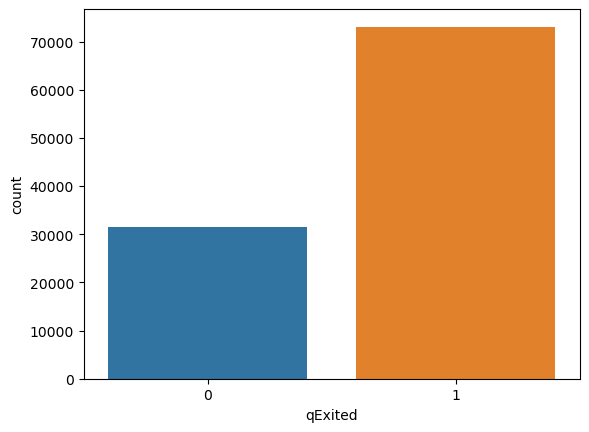

In [20]:
#sns.countplot(data['qExited'])
sns.countplot(x ='qExited', data = data)


In [21]:
X = data.drop('qExited', axis=1)
y = data['qExited']

In [22]:
y


0         1
1         1
2         0
3         1
4         1
         ..
104558    0
104559    0
104560    1
104561    1
104562    0
Name: qExited, Length: 104563, dtype: int64

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,543,57,8,71164.91652,1,0,0,15850.9262,1,0,0
1,550,37,9,82988.85867,1,0,1,192452.7462,0,1,1
2,542,33,2,20428.37255,3,1,0,131317.4542,0,0,0
3,523,32,8,65997.52616,3,1,0,193082.6991,1,0,1
4,381,44,7,44174.92374,3,0,1,175851.6695,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
104558,771,39,5,0.00000,2,1,0,96270.6400,0,0,1
104559,516,35,10,57369.61000,1,1,1,101699.7700,0,0,1
104560,709,36,7,0.00000,1,0,1,42085.5800,0,0,0
104561,772,42,3,75075.31000,2,1,0,92888.5200,1,0,1


In [24]:
#X_res, y_res = SMOTE().fit_resample(X,y)

In [25]:
#y_res.value_counts()

In [26]:
#y

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
sc=StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [30]:
X_train

array([[-1.2409045 ,  0.75904941,  0.85028907, ..., -0.69326012,
         1.4463229 , -1.00318499],
       [ 0.33299435, -0.66644237, -0.8870929 , ..., -0.69326012,
        -0.69140854, -1.00318499],
       [ 1.31587813, -0.49538336,  1.19776546, ...,  1.44246002,
        -0.69140854,  0.99682512],
       ...,
       [ 1.2387892 , -1.17961942, -0.19214011, ..., -0.69326012,
        -0.69140854, -1.00318499],
       [-1.55568427,  1.44328547, -0.19214011, ..., -0.69326012,
         1.4463229 ,  0.99682512],
       [-0.2387485 , -1.35067843,  0.50281267, ..., -0.69326012,
         1.4463229 ,  0.99682512]])

In [31]:
log = LogisticRegression()

In [32]:
log.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred1 = log.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred1)

0.7057332759527567

In [35]:

recall_score(y_test, y_pred1)

0.9992505280370648

In [36]:
precision_score(y_test, y_pred1)

0.7047911961170648

In [37]:
f1_score(y_test, y_pred1)

0.8265794961393225

In [67]:
svm = svm.SVC()

In [68]:
svm.fit(X_train, y_train)

SVC()

In [69]:
y_pred2 = svm.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred2)


0.7410701477549849

In [71]:
recall_score(y_test,y_pred2)

0.9850786945561082

In [72]:
f1_score(y_test,y_pred2)

0.8422708339401708

In [73]:
precision_score(y_test,y_pred2)

0.7356263356059836

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred3 = knn.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred3)

0.6907186917228518

In [42]:
precision_score(y_test,y_pred3)

0.7383427210963359

In [43]:
f1_score(y_test,y_pred3)

0.7972286663740674

In [44]:
recall_score(y_test,y_pred3)

0.8663214553382844

In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred4 = dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred4)

0.6271218859082867

In [49]:
precision_score(y_test,y_pred4)

0.7409794717298396

In [50]:
recall_score(y_test,y_pred4)


0.7205832254547933

In [51]:
f1_score(y_test,y_pred4)

0.7306390328151986

In [52]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred5 = rf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred5)

0.7522115430593411

In [56]:
precision_score(y_test,y_pred5)

0.7471240435167352

In [57]:
recall_score(y_test,y_pred5)

0.9779246440008176

In [58]:
f1_score(y_test,y_pred5)

0.8470845136921624

In [59]:
gbc = GradientBoostingClassifier()

In [60]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [61]:
y_pred6 = gbc.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred6)

0.7547458518624779

In [63]:
precision_score(y_test,y_pred6)

0.7460571075146892

In [64]:
recall_score(y_test,y_pred6)

0.9862369694079172

In [65]:
f1_score(y_test,y_pred6)

0.8494967575339651

In [78]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RFC', 'GBC'], 
                           'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)],
                          'PREC':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)],
                          'RECALL':[recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),
                                  recall_score(y_test,y_pred3),recall_score(y_test,y_pred4),
                                  recall_score(y_test,y_pred5),recall_score(y_test,y_pred6)],
                          'F1':[f1_score(y_test,y_pred1),f1_score(y_test,y_pred2),
                                  f1_score(y_test,y_pred3),f1_score(y_test,y_pred4),
                                  f1_score(y_test,y_pred5),f1_score(y_test,y_pred6)]})

In [79]:
final_data

,Models,ACC,PREC,RECALL,F1
0,LR,0.705733,0.704791,0.999251,0.826579
1,SVC,0.741070,0.735626,0.985079,0.842271
2,KNN,0.690719,0.738343,0.866321,0.797229
3,DT,0.627122,0.740979,0.720583,0.730639
4,RFC,0.752212,0.747124,0.977925,0.847085
5,GBC,0.754746,0.746057,0.986237,0.849497


In [80]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

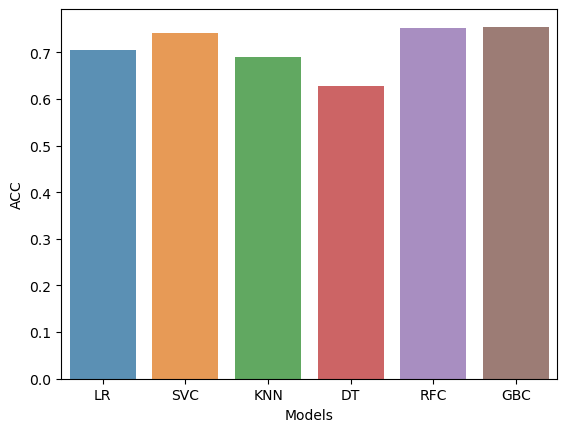

In [81]:
sns.barplot(x=final_data.Models, y=final_data.ACC, alpha=0.8)

<Axes: xlabel='Models', ylabel='PREC'>

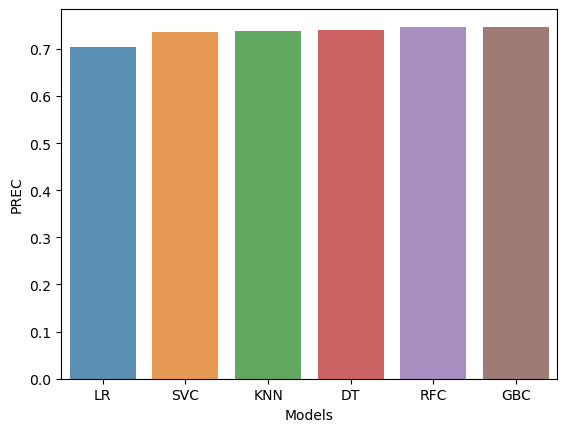

In [82]:
sns.barplot(x=final_data.Models, y=final_data.PREC, alpha=0.8)

<Axes: xlabel='Models', ylabel='RECALL'>

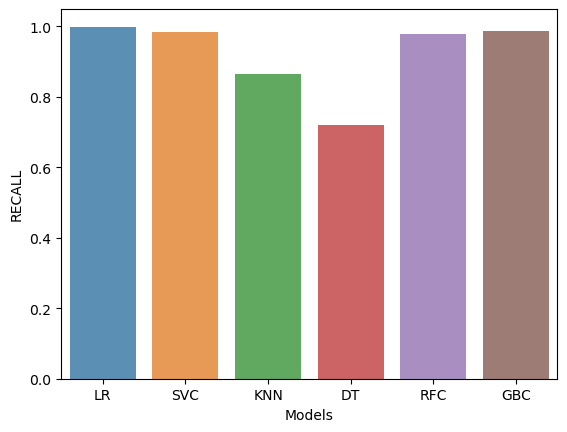

In [83]:
sns.barplot(x=final_data.Models, y=final_data.RECALL, alpha=0.8)

<Axes: xlabel='Models', ylabel='F1'>

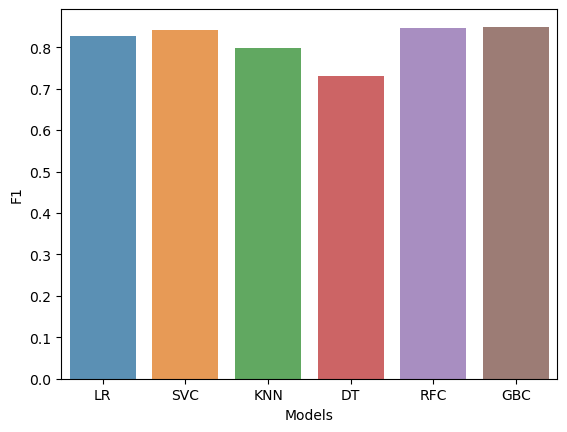

In [84]:
sns.barplot(x=final_data.Models, y=final_data.F1, alpha=0.8)

In [85]:
cm = confusion_matrix(y_test,y_pred5)
print(cm)
accuracy_score(y_test,y_pred5)

[[ 1378  4858]
 [  324 14353]]


0.7522115430593411

In [86]:
X_res = sc.fit_transform(X)

In [87]:
rf.fit(X, y)

RandomForestClassifier()

In [88]:
joblib.dump(rf, 'Churn_predict_model')

['Churn_predict_model']

In [89]:
model = joblib.load('Churn_predict_model')

In [90]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

C:\Users\VAMSHI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [91]:
from tkinter import *

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
import joblib

In [ ]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9==1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9==2:
            Geography_Germany=0
            Geography_Spain=1
            Geography_France=0
    elif p9==3:
                Geography_Germany=0
                Geography_Spain=0
                Geography_France=1
    p10 = int(e10.get())
    model = joblib.load('Churn_predict_model')
    result  = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result==0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
        
        
master = Tk()
master.title("Bank Customer Churn Prediction")
    
Label(master, text="Main Bank Customer Churn Prediction", bg = "black", fg = "white"). \
    grid(row=0,columnspan=2)
    
    
Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master, text="Gender").grid(row=10)
    
    
e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
    
    
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
    
    
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()